In [1]:
from sklearn.model_selection import train_test_split
from Data.Dataset import LatentFMRIDataset
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data_directory = '/Users/balazsmorvay/PycharmProjects/VAE/Assets/NYU_UM1_merged'
test_ratio = 0.15
dataset = LatentFMRIDataset(data_dir=data_directory)
all_data_items = dataset.get_all_items()
X = all_data_items['X']
y = all_data_items['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_ratio)

In [3]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((45198, 4, 16, 18), (45198,), (7977, 4, 16, 18), (7977,))

In [4]:
X = X.reshape(X.shape[0], -1)
X.shape

(53175, 1152)

In [5]:
X.min(), X.max(), X.mean(), X.std()

(-1.0, 1.0, -0.07695256010329889, 0.3402111948737177)

In [6]:
X = (X - X.min()) / (X.max() - X.min())
X.min(), X.max(), X.mean(), X.std()

(0.0, 1.0, 0.46152371994835056, 0.17010559743685885)

In [7]:
pca = PCA(n_components=3)
pca.fit(X)
X = pca.transform(X)

In [8]:
X.shape

(53175, 3)

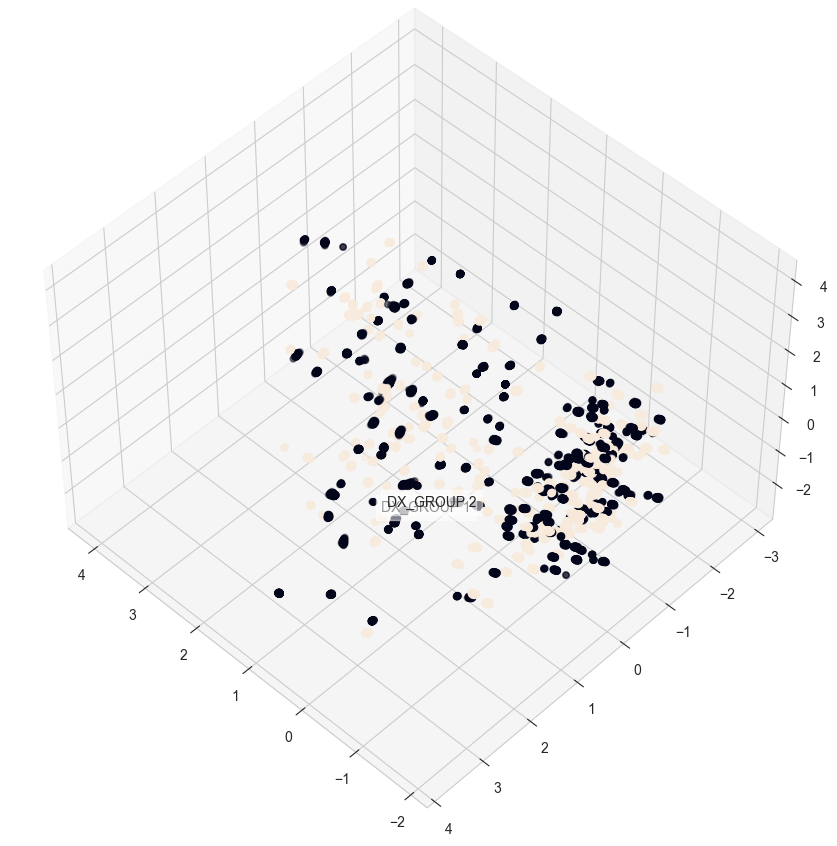

In [9]:
# TODO: forgathaó plotlyval
# TODO: svm a dim csökkentett adatokon
# TODO: cross tanítás / értékelés 

fig = plt.figure(1, figsize=(10, 8))
plt.clf()
ax = fig.add_subplot(111, projection="3d", elev=48, azim=134)
ax.set_position([0, 0, 0.95, 1])
plt.cla()

for name, label in [("DX_GROUP 1", 1), ("DX_GROUP 2", 2)]:
    ax.text3D(
        X[y == label, 0].mean(),
        X[y == label, 1].mean() + 1.5,
        X[y == label, 2].mean(),
        name,
        horizontalalignment="center",
        bbox=dict(alpha=0.5, edgecolor="w", facecolor="w"),
    )
    
# Reorder the labels to have colors matching the cluster results
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, alpha=0.3)

plt.show()

In [10]:
data_len = X[:, 0].shape[0]
data_len

53175

In [11]:
X.shape

(53175, 3)

Text(0.5, 1.0, 'Third principal component')

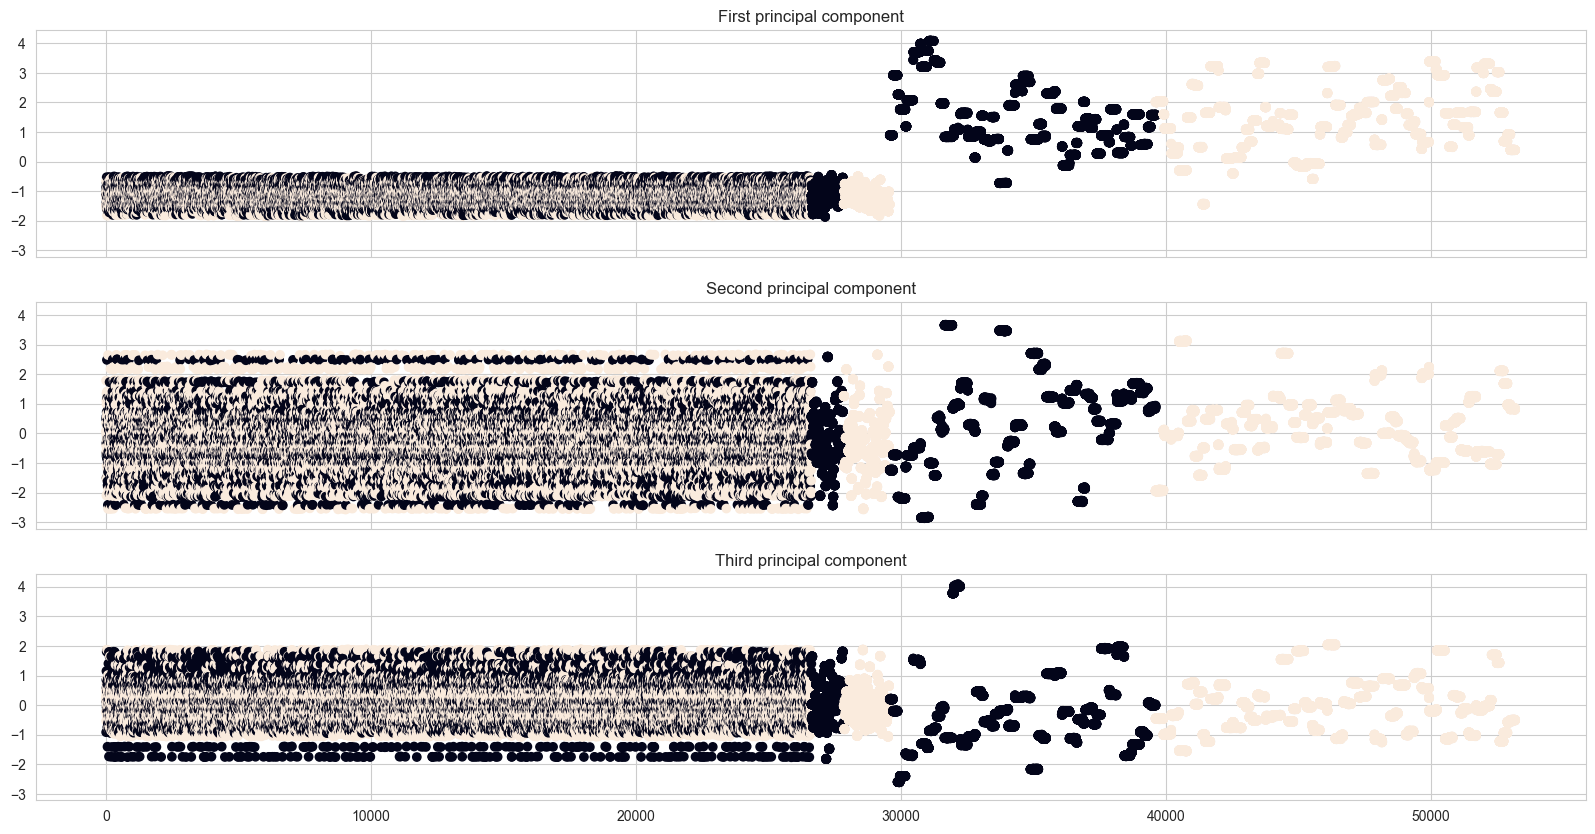

In [12]:
f, axarr = plt.subplots(3, 1, figsize=(20, 10), sharex=True, sharey=True)
axarr[0].scatter(np.linspace(0, data_len, data_len), X[:, 0], c=y)
axarr[0].set_title("First principal component")
axarr[1].scatter(np.linspace(0, data_len, data_len), X[:, 1], c=y)
axarr[1].set_title("Second principal component")
axarr[2].scatter(np.linspace(0, data_len, data_len), X[:, 2], c=y)
axarr[2].set_title("Third principal component")

In [12]:
['red' if l == 1 else 'blue' for l in y][:10]

['blue', 'blue', 'blue', 'blue', 'red', 'blue', 'blue', 'blue', 'blue', 'blue']

Text(0.5, 1.0, 'Third principal component')

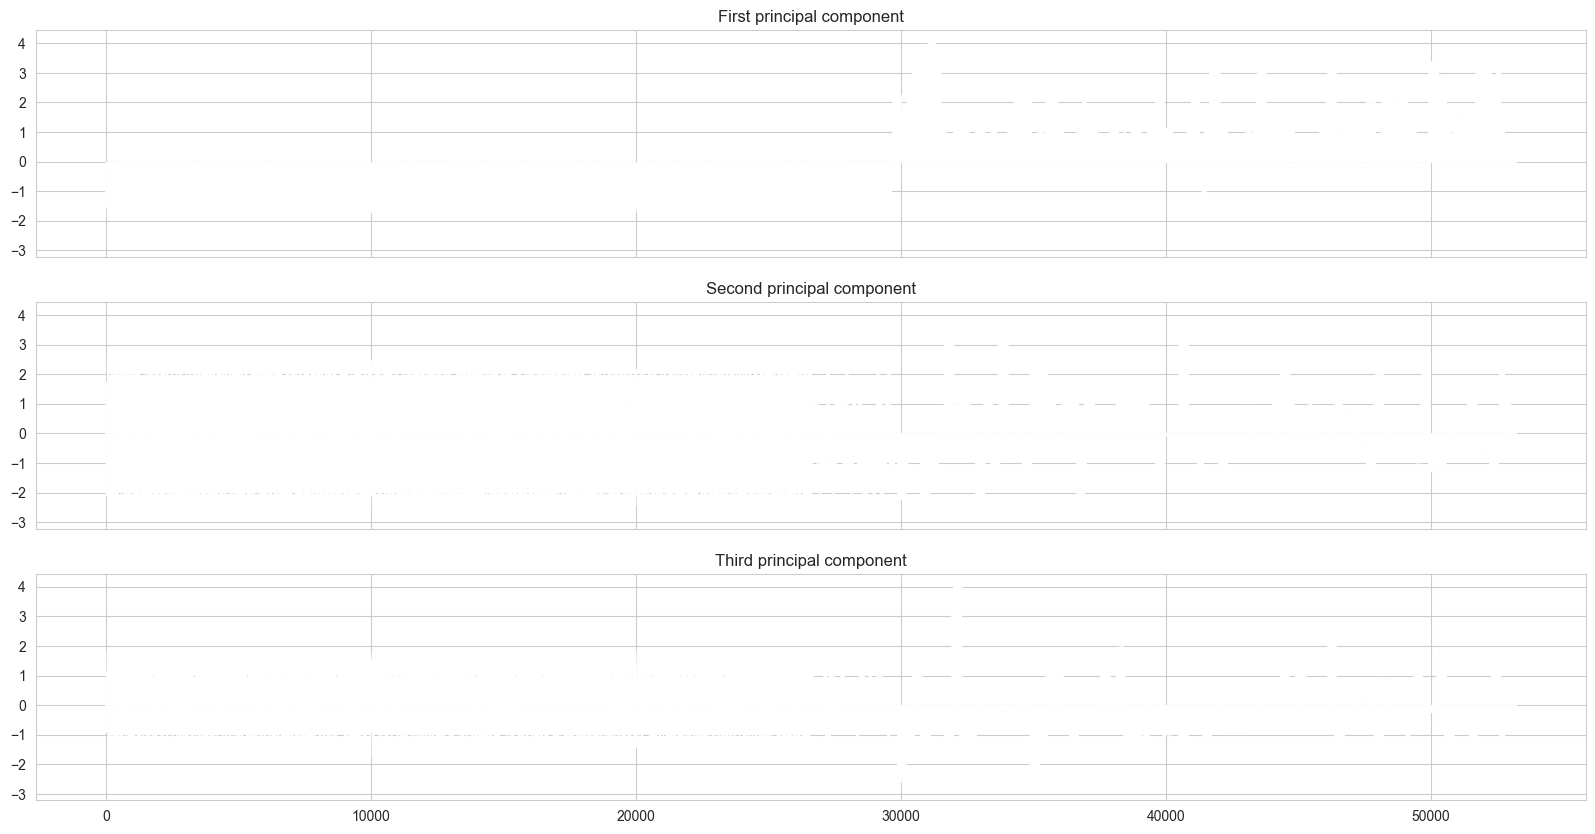

In [11]:
f, axarr = plt.subplots(3, 1, figsize=(20, 10), sharex=True, sharey=True)
plt.figure(1, figsize=(20, 10))
axarr[0].bar(np.linspace(0, data_len, data_len), X[:, 0], color=['red' if l == 1 else 'blue' for l in y])
axarr[0].set_title("First principal component")
axarr[1].bar(np.linspace(0, data_len, data_len), X[:, 1], color=['red' if l == 1 else 'blue' for l in y])
axarr[1].set_title("Second principal component")
axarr[2].bar(np.linspace(0, data_len, data_len), X[:, 2], color=['red' if l == 1 else 'blue' for l in y])
axarr[2].set_title("Third principal component")

In [ ]:
np.corrcoef(X).shape

KeyboardInterrupt: 

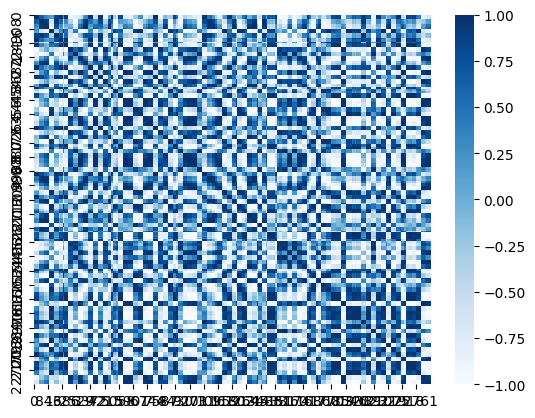

In [137]:
import seaborn as sb
sb.heatmap(np.corrcoef(X), cmap="Blues", annot=True)